<a href="https://colab.research.google.com/github/AdithyaDVarma/Biology_AI-in-agriculture_Semester1/blob/main/Salary_Prediction_AIE_B_Project_Sem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
# importing the necessary modules and packages
import os
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn import linear_model 
import statsmodels.formula.api as smf

**DATA HANDLING**

In [255]:
#Creating the YearsExperience vs Salary data using training set csv
import csv
import random
f=open("Trainingset.csv","w")
w=csv.writer(f)
w.writerow(["Age","YearsExperience","Years of Education","QYears of Education","CombinedParameter","Salary"])

for i in range(1000):
  age=random.randint(24,65)
  if age>=24 and age<=30:
      exp=random.uniform(1,4.3)
      educ=random.randint(3,6)
      sal=random.uniform(40000.7,60000.54)
  elif age>=31 and age<=40:
      exp=random.uniform(4.6,7.8)
      educ=random.randint(3,7)
      sal=random.uniform(50000.7,80000.54)
  elif age>=41 and age<=50:
      exp=random.uniform(7,12)
      educ=random.randint(5,9)
      sal=random.uniform(60000.7,90000.54)
  elif age>=51:
      exp=random.uniform(12,20)
      educ=random.randint(3,9)
      sal=random.uniform(50000.7,100000.54)
      w.writerow([age,exp,educ,educ**2,(age+exp)*educ,sal])
f.close()

f=open("Testset.csv","w")
w=csv.writer(f)
w.writerow(["Age","YearsExperience","Years of Education","QYears of Education","CombinedParameter","Salary"])

for i in range(1000):
  age=random.randint(24,65)
  if age>=24 and age<=30:
      exp=random.uniform(1,4.3)
      educ=random.randint(3,6)
      sal=random.uniform(40000.7,60000.54)
  elif age>=31 and age<=40:
      exp=random.uniform(4.6,7.8)
      educ=random.randint(3,7)
      sal=random.uniform(50000.7,80000.54)
  elif age>=41 and age<=50:
      exp=random.uniform(7,12)
      educ=random.randint(5,9)
      sal=random.uniform(60000.7,90000.54)
  elif age>=51:
      exp=random.uniform(12,20)
      educ=random.randint(3,9)
      sal=random.uniform(50000.7,100000.54)
      w.writerow([age,exp,educ,educ**2,(age+exp)*educ,sal])
f.close()




In [256]:
# Initializing the trainingset and testset data objects using pandas
Testset = pd.read_csv("Testset.csv")
Training = pd.read_csv("Trainingset.csv") 

#The head() function is used to get the first few rows
Testset.head()

,Age,YearsExperience,Years of Education,QYears of Education,CombinedParameter,Salary
0,63,13.703036,4,16,306.812145,50315.750393
1,61,17.440310,9,81,705.962789,68427.951072
2,62,13.864240,3,9,227.592719,62002.842940
3,61,19.739764,9,81,726.657874,53677.498267
4,51,17.875034,4,16,275.500135,71662.599810


In [257]:
# Using the data object  to find some general values like mean, minimum etc
Testset.describe()

,Age,YearsExperience,Years of Education,QYears of Education,CombinedParameter,Salary
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,58.117318,15.851799,5.765363,37.346369,425.954739,73215.608740
std,4.188511,2.343184,2.029399,24.084646,151.811104,14418.470310
min,51.000000,12.000329,3.000000,9.000000,195.489274,50063.395020
25%,55.000000,13.941566,4.000000,16.000000,293.993140,60981.689147
50%,58.000000,15.577409,6.000000,36.000000,411.538747,72174.992513
75%,61.000000,18.066805,7.750000,60.250000,559.545589,84857.983798
max,65.000000,19.999206,9.000000,81.000000,741.519469,99972.169352


In [258]:
# corr() is used to find the pairwise correlation of all columns in the data we provided.
# The closer its value is to 1, the more variability the model explains.
Testset.corr()

,Age,YearsExperience,Years of Education,QYears of Education,CombinedParameter,Salary
Age,1.000000,-0.089430,-0.061342,-0.052662,0.087135,-0.040303
YearsExperience,-0.089430,1.000000,0.003347,0.014002,0.074482,0.049187
Years of Education,-0.061342,0.003347,1.000000,0.989563,0.983594,-0.029242
QYears of Education,-0.052662,0.014002,0.989563,1.000000,0.974491,-0.031364
CombinedParameter,0.087135,0.074482,0.983594,0.974491,1.000000,-0.030994
Salary,-0.040303,0.049187,-0.029242,-0.031364,-0.030994,1.000000


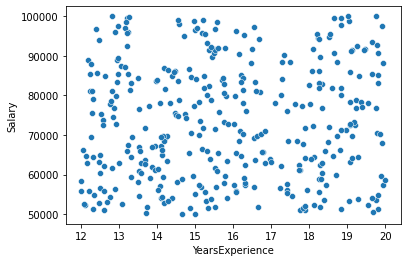

In [259]:
# We are using seaborn, which is used to display mathematical scatter plot of the given data
sns.scatterplot(data=Testset, x="YearsExperience",y="Salary")

In [260]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved
#Dataset = pd.read_csv("T.csv")
lm = linear_model.LinearRegression(). fit(Training[["YearsExperience"]],Training[["Salary"]])
# Using the predict method

result=lm.predict(Testset[["YearsExperience"]])

In [261]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset.head()

,Age,YearsExperience,Years of Education,QYears of Education,CombinedParameter,Salary,Predicted Salary Using Sklearn method
0,63,13.703036,4,16,306.812145,50315.750393,74313.238843
1,61,17.440310,9,81,705.962789,68427.951072,76411.631396
2,62,13.864240,3,9,227.592719,62002.842940,74403.750874
3,61,19.739764,9,81,726.657874,53677.498267,77702.721481
4,51,17.875034,4,16,275.500135,71662.599810,76655.718797


In [262]:
# Created a new column to show the error current salary minus predicted salary
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYears of Education,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,63,13.703036,4,16,306.812145,50315.750393,74313.238843,-23997.488450
1,61,17.440310,9,81,705.962789,68427.951072,76411.631396,-7983.680323
2,62,13.864240,3,9,227.592719,62002.842940,74403.750874,-12400.907933
3,61,19.739764,9,81,726.657874,53677.498267,77702.721481,-24025.223214
4,51,17.875034,4,16,275.500135,71662.599810,76655.718797,-4993.118987


Text(0.5, 1.0, 'Linear Regression: Years of Experience vS Corresponding Salary ')

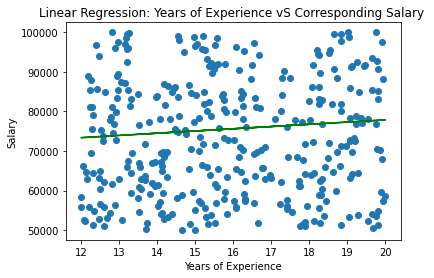

In [263]:
# Plotting Linear Regression graph with Sklearn  
plt.scatter(Testset["YearsExperience"], Testset["Salary"])
plt.plot(Testset["YearsExperience"],Testset["Predicted Salary Using Sklearn method"], color="green")
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.title("Linear Regression: Years of Experience vS Corresponding Salary ")

In [264]:
m=lm.coef_

In [265]:
b=lm.intercept_

In [266]:
#Testing for 7 years of experience
Salary = b + m * 7
Salary

array([[70549.63921983]])

In [267]:
lm.predict([[7]]) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[70549.63921983]])

In [268]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


AGE VS SALARY CONDITION

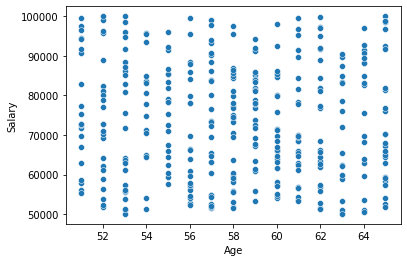

In [269]:
sns.scatterplot(data=Testset, x="Age",y="Salary")

In [270]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["Age"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["Age"]])

In [271]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYears of Education,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,63,13.703036,4,16,306.812145,50315.750393,77439.297955,-27123.547562
1,61,17.440310,9,81,705.962789,68427.951072,76717.338787,-8289.387714
2,62,13.864240,3,9,227.592719,62002.842940,77078.318371,-15075.475430
3,61,19.739764,9,81,726.657874,53677.498267,76717.338787,-23039.840520
4,51,17.875034,4,16,275.500135,71662.599810,73107.542946,-1444.943136


Text(0.5, 1.0, 'Linear Regression: Age vS Corresponding Salary ')

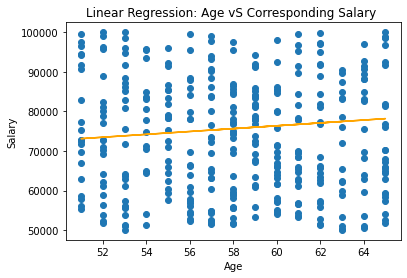

In [272]:
plt.scatter(Testset["Age"], Testset["Salary"])
plt.plot(Testset["Age"],Testset["Predicted Salary Using Sklearn method"], color="orange")
plt.ylabel("Salary")
plt.xlabel("Age")
plt.title("Linear Regression: Age vS Corresponding Salary ")

In [273]:
m=lm.coef_

In [274]:
b=lm.intercept_

In [275]:
#Testing for 7 years of experience
Salary = b + m * 7
Salary

array([[57224.44124916]])

In [276]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[57224.44124916]])

In [277]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


YEARS OF EDUCATION VS SALARY

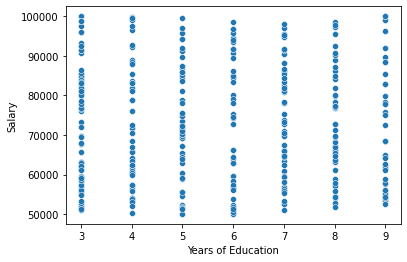

In [278]:
sns.scatterplot(data=Testset, x="Years of Education",y="Salary")

In [279]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["Years of Education"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["Years of Education"]])

In [280]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYears of Education,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,63,13.703036,4,16,306.812145,50315.750393,76857.951077,-26542.200684
1,61,17.440310,9,81,705.962789,68427.951072,73627.108569,-5199.157496
2,62,13.864240,3,9,227.592719,62002.842940,77504.119578,-15501.276638
3,61,19.739764,9,81,726.657874,53677.498267,73627.108569,-19949.610302
4,51,17.875034,4,16,275.500135,71662.599810,76857.951077,-5195.351267


Text(0.5, 1.0, 'Linear Regression: Years of Education vS Corresponding Salary ')

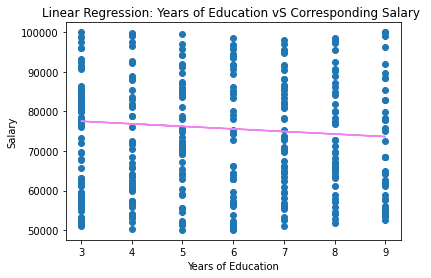

In [281]:
plt.scatter(Testset["Years of Education"], Testset["Salary"])
plt.plot(Testset["Years of Education"],Testset["Predicted Salary Using Sklearn method"], color="violet")
plt.ylabel("Salary")
plt.xlabel("Years of Education")
plt.title("Linear Regression: Years of Education vS Corresponding Salary ")

In [282]:
m=lm.coef_

In [283]:
b=lm.intercept_


In [284]:
#Testing for 7 years of education
Salary = b + m * 7
Salary

array([[74919.44557195]])

In [285]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[74919.44557195]])

In [286]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


THREE PARAMETERS VS SALARY


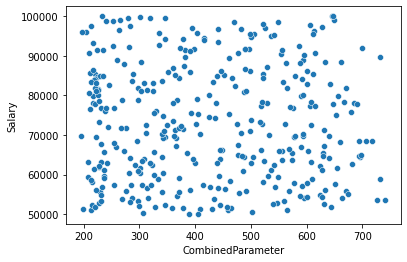

In [287]:
sns.scatterplot(data=Testset, x="CombinedParameter",y="Salary")

In [288]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["CombinedParameter"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["CombinedParameter"]])

In [289]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYears of Education,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,63,13.703036,4,16,306.812145,50315.750393,76429.452842,-26113.702450
1,61,17.440310,9,81,705.962789,68427.951072,73928.385856,-5500.434784
2,62,13.864240,3,9,227.592719,62002.842940,76925.839592,-14922.996651
3,61,19.739764,9,81,726.657874,53677.498267,73798.711023,-20121.212756
4,51,17.875034,4,16,275.500135,71662.599810,76625.653039,-4963.053229


Text(0.5, 1.0, 'Linear Regression: Combined Parameters vS Corresponding Salary ')

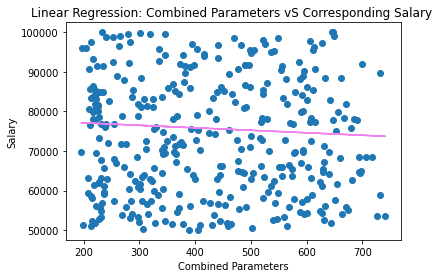

In [290]:
plt.scatter(Testset["CombinedParameter"], Testset["Salary"])
plt.plot(Testset["CombinedParameter"],Testset["Predicted Salary Using Sklearn method"], color="violet")
plt.ylabel("Salary")
plt.xlabel("Combined Parameters")
plt.title("Linear Regression: Combined Parameters vS Corresponding Salary ")

In [291]:
m=lm.coef_

In [292]:
b=lm.intercept_

In [293]:
#Testing for 7 years of education
Salary = b + m * 7
Salary

array([[78308.06752127]])

In [294]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[78308.06752127]])

In [295]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


QUADRATIC YEARS OF EDUCATION VS SALARY


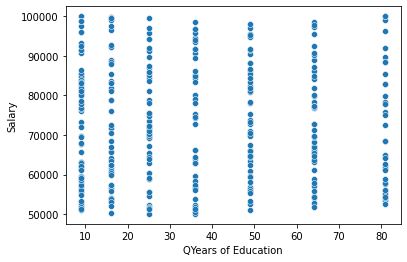

In [296]:
sns.scatterplot(data=Testset, x="QYears of Education",y="Salary")

In [297]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["QYears of Education"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["QYears of Education"]])

In [298]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYears of Education,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,63,13.703036,4,16,306.812145,50315.750393,76713.141462,-26397.391069
1,61,17.440310,9,81,705.962789,68427.951072,73612.573024,-5184.621951
2,62,13.864240,3,9,227.592719,62002.842940,77047.048832,-15044.205892
3,61,19.739764,9,81,726.657874,53677.498267,73612.573024,-19935.074757
4,51,17.875034,4,16,275.500135,71662.599810,76713.141462,-5050.541652


Text(0.5, 1.0, 'Linear Regression: Years of Education vS Corresponding Salary ')

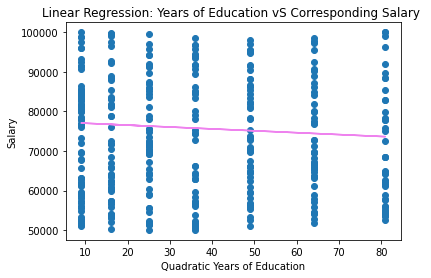

In [299]:
plt.scatter(Testset["QYears of Education"], Testset["Salary"])
plt.plot(Testset["QYears of Education"],Testset["Predicted Salary Using Sklearn method"], color="violet")
plt.ylabel("Salary")
plt.xlabel("Quadratic Years of Education")
plt.title("Linear Regression: Years of Education vS Corresponding Salary ")

In [300]:
m=lm.coef_

In [301]:
b=lm.intercept_

In [302]:
#Testing for 7 years of education
Salary = b + m * 7
Salary

array([[77142.45093805]])

In [303]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[77142.45093805]])

In [304]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
